Dataset Description
In this competition, you will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.

File Descriptions and Data Field Information  

**train.csv**  
The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
store_nbr identifies the store at which the products are sold.
family identifies the type of product sold.
sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.  

**test.csv**  
The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
The dates in the test data are for the 15 days after the last date in the training data.

**stores.csv**  
Store metadata, including city, state, type, and cluster.
cluster is a grouping of similar stores.

**oil.csv**  
Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

**holidays_events.csv**  
Holidays and Events, with metadata

NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).
Additional Notes
Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

Описание набора данных
В этом соревновании вам предстоит спрогнозировать продажи тысяч семейств товаров, продаваемых в магазинах Favorita, расположенных в Эквадоре. Данные обучения включают даты, информацию о магазине и продукте, информацию о том, продвигался ли этот товар, а также номера продаж. Дополнительные файлы содержат дополнительную информацию, которая может быть полезна при построении ваших моделей.

Описания файлов и информация о полях данных

**train.csv**  
Данные обучения, включающие временные ряды функций store_nbr, Family и onPromotion, а также целевые продажи.
store_nbr идентифицирует магазин, в котором продаются товары.
Семья определяет тип продаваемого продукта.
Продажи дают общий объем продаж семейства продуктов в конкретном магазине на определенную дату. Возможны дробные значения, поскольку продукция может продаваться в дробных единицах (например, 1,5 кг сыра, а не 1 пакетик чипсов).
onpromotion дает общее количество товаров в семействе продуктов, которые продвигались в магазине на определенную дату.

**test.csv**  
Тестовые данные, имеющие те же характеристики, что и обучающие данные. В этом файле вы спрогнозируете целевые продажи на даты.
Даты в тестовых данных относятся к 15 дням после последней даты в обучающих данных.

**stores.csv**  

Храните метаданные, включая город, штат, тип и кластер.
кластер — это группа похожих магазинов.

**Oil.csv**  
Ежедневная цена на нефть. Включает значения как во время обучения, так и во время тестовых данных. (Эквадор является нефтезависимой страной, и ее экономическое здоровье очень уязвимо к колебаниям цен на нефть.)

**Holidays_events.csv**  
Праздники и события с метаданными


ПРИМЕЧАНИЕ. Обратите особое внимание на переносимый столбец. Перенесенный праздник официально приходится на этот календарный день, но был перенесен правительством на другую дату. Перенесенный день больше похож на обычный день, чем на праздник. Чтобы найти день, когда он действительно отмечался, найдите соответствующую строку, где тип — Перенос. Например, праздник Независимости Гуаякиля был перенесен с 09.10.2012 на 12.10.2012, что означает, что он отмечался 12.10.2012. Дни типа Bridge — это дополнительные дни, которые добавляются к празднику (например, чтобы продлить перерыв на длинные выходные). Они часто состоят из типа «Рабочий день», который представляет собой день, обычно не запланированный для работы (например, суббота), предназначенный для окупаемости Моста.
Дополнительные праздники — это дни, добавленные к обычному календарному празднику, например, как это обычно бывает перед Рождеством (сочельник становится праздником).
Дополнительные замечания
Заработная плата в бюджетной сфере выплачивается каждые две недели – 15-го и в последний день месяца. Это может повлиять на продажи в супермаркетах.
Землетрясение магнитудой 7,8 произошло в Эквадоре 16 апреля 2016 года. Люди сплотились, чтобы оказать помощь, жертвуя воду и другие продукты первой необходимости, что сильно повлияло на продажи в супермаркетах в течение нескольких недель после землетрясения.

# 1. Import Packages and Datasets

In [1]:
# Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import catboost as cb 
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import warnings
import plotly.express as px

warnings.filterwarnings('ignore')

In [2]:
# Loading data
train  = pd.read_csv("C:/Users/user/Desktop/Кегля/store-sales-time-series-forecasting/train.csv")
test = pd.read_csv("C:/Users/user/Desktop/Кегля/store-sales-time-series-forecasting/test.csv")
transactions = pd.read_csv("C:/Users/user/Desktop/Кегля/store-sales-time-series-forecasting/transactions.csv")
stores = pd.read_csv("C:/Users/user/Desktop/Кегля/store-sales-time-series-forecasting/stores.csv")
oil = pd.read_csv("C:/Users/user/Desktop/Кегля/store-sales-time-series-forecasting/oil.csv")
holidays_events = pd.read_csv("C:/Users/user/Desktop/Кегля/store-sales-time-series-forecasting/holidays_events.csv")

In [3]:
train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
transactions.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [5]:
stores.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
oil.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [7]:
holidays_events.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
# Объединим датасеты для трейна

train = pd.merge(train, stores, how='left', on='store_nbr')
train = pd.merge(train, oil, how='left', on='date')
train = pd.merge(train, transactions, how='left', on=['store_nbr', 'date'])
train = pd.merge(train, holidays_events, how='left', on='date')

In [9]:
train.head(5)

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,transactions,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [10]:
# Объединим датасеты для теста

test = pd.merge(test, stores, how='left', on='store_nbr')
test = pd.merge(test, oil, how='left', on='date')
test = pd.merge(test, transactions, how='left', on=['store_nbr', 'date'])
test = pd.merge(test, holidays_events, how='left', on='date')

In [11]:
test.head(5)

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,dcoilwtico,transactions,type_y,locale,locale_name,description,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN,NaN
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN,NaN
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN,NaN
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.8,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Далее будем работать с трейном, проверим количество пропусков в датасете

mv = train.isnull().sum().to_frame()
pd.concat([mv], axis=1, keys=['Missing values']).transpose()

,,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,transactions,type_y,locale,locale_name,description,transferred
Missing values,0,0,0,0,0,0,0,0,0,0,0,955152,249117,2551824,2551824,2551824,2551824,2551824


In [17]:
#group by 'family', then sort by sales, and create a column for aggregate sales percent
temp = train.groupby('family').sum('sales').reset_index().sort_values(by='sales', ascending=False)

#aggregated sales
temp = temp[['family','sales']]
temp['percent']=(temp['sales']/temp['sales'].sum() * 100)

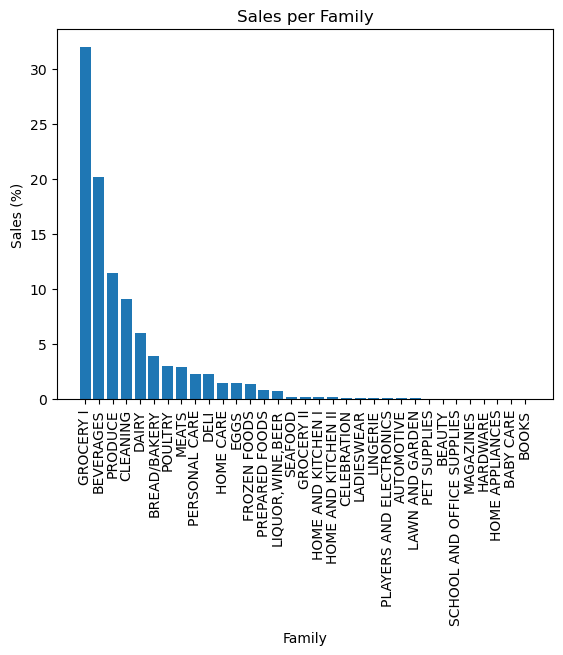

In [18]:
# Построим барплот по топ-5 family

plt.bar(temp['family'], temp['percent'])
plt.xlabel('Family')
plt.ylabel('Sales (%)')
plt.title('Sales per Family')
plt.xticks(rotation = 90)
plt.show()